In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np
from itertools import product
import networkx as nx
import pickle
from wisdom_of_crowds import Crowd

In [2]:
df = pd.read_csv('original_plot_data.csv')

In [3]:
df

,s,d,pi
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
180,15,3,45
181,15,3,45
182,15,3,45
183,15,3,45


In [90]:
#sort by pi
z = sorted([(pi,s,d) for pi,s,d in zip(df['pi'],df['s'],df['d'])])
pis = [pi for pi,s,d in z]
sds = [(s,d) for pi,s,d in z]

In [159]:


total = len(pis)
c = Counter(pis)
cum = 0

xs = [0]
ys = [0]
 
for pi in c:
    
    

    
    xs.append(cum)
    ys.append(ys[-1])
    xs.append(cum)
    ys.append(pi)
    cum += c[pi] / total
    

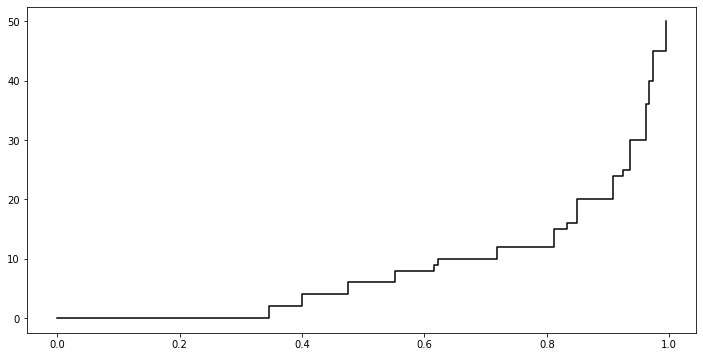

In [166]:
plt.figure(figsize=(12,6))
plt.plot(xs,ys,c='k')
plt.show()

In [203]:
cmap = plt.get_cmap('gist_yarg_r')
norm = Normalize(vmin=min(df['d'])-1,vmax=max(df['d']+1))

sdcounter = Counter(sds)
total = len(pis)
current_x = 0 
cum = 0

barx = [] 
barwidth = []
barheight = [] 
barcolors = []
seen = [] 
for pi,s,d in z: 
    if (pi,s,d) in seen:
        pass
    else:
        print(pi,s,d,current_x,sdcounter[(s,d)]/total)
        
        barx.append(current_x) 
        
        cum += (sdcounter[(s,d)]/total)
        current_x = cum
        
        barwidth.append(sdcounter[(s,d)]/total)
        barheight.append(s)
        barcolors.append(cmap(norm(d))) 
        seen.append((pi,s,d))

0 0 1 0 0.2864864864864865
0 0 2 0.2864864864864865 0.05405405405405406
0 0 3 0.34054054054054056 0.005405405405405406
2 2 1 0.34594594594594597 0.05405405405405406
4 2 2 0.4 0.032432432432432434
4 4 1 0.43243243243243246 0.043243243243243246
6 2 3 0.4756756756756757 0.016216216216216217
6 3 2 0.4918918918918919 0.032432432432432434
6 6 1 0.5243243243243243 0.02702702702702703
8 4 2 0.5513513513513513 0.03783783783783784
8 8 1 0.5891891891891892 0.02702702702702703
9 9 1 0.6162162162162161 0.005405405405405406
10 5 2 0.6216216216216215 0.005405405405405406
10 10 1 0.6270270270270268 0.0918918918918919
12 4 3 0.7189189189189187 0.016216216216216217
12 6 2 0.735135135135135 0.07027027027027027
12 12 1 0.8054054054054052 0.005405405405405406
15 15 1 0.8108108108108105 0.021621621621621623
16 8 2 0.8324324324324321 0.016216216216216217
20 10 2 0.8486486486486484 0.05945945945945946
24 8 3 0.9081081081081079 0.016216216216216217
25 25 1 0.9243243243243242 0.010810810810810811
30 10 3 0.9351

In [204]:
cmap(norm(3))

(0.7529411764705882, 0.7529411764705882, 0.7529411764705882, 1.0)

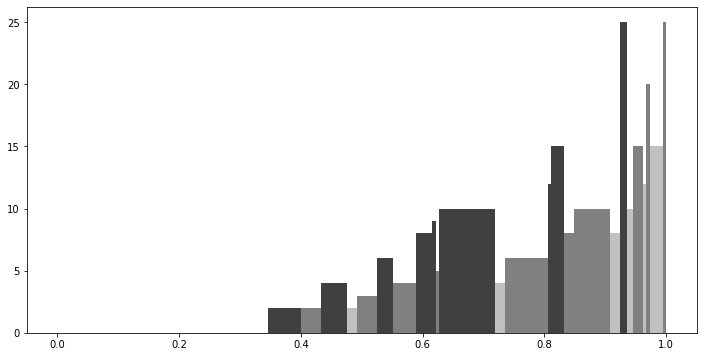

In [205]:
plt.figure(figsize=(12,6))
plt.bar(barx,barheight,width=barwidth,color=barcolors,align='edge')
plt.show()

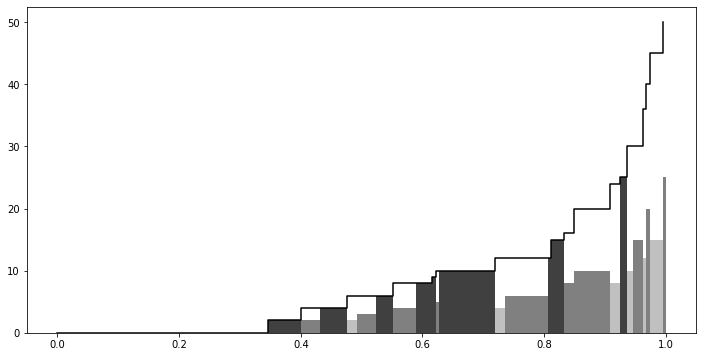

In [206]:
plt.figure(figsize=(12,6))
plt.bar(barx,barheight,width=barwidth,color=barcolors,align='edge')
plt.plot(xs,ys,c='k')


plt.show()

In [202]:
min(df['d'])-1

0

In [142]:
barheight

[0,
 0,
 0,
 2,
 2,
 4,
 2,
 3,
 6,
 4,
 8,
 9,
 5,
 10,
 4,
 6,
 12,
 15,
 8,
 10,
 8,
 25,
 10,
 15,
 12,
 20,
 15,
 25]

In [143]:
barwidth

[0.2864864864864865,
 0.05405405405405406,
 0.005405405405405406,
 0.05405405405405406,
 0.032432432432432434,
 0.043243243243243246,
 0.016216216216216217,
 0.032432432432432434,
 0.02702702702702703,
 0.03783783783783784,
 0.02702702702702703,
 0.005405405405405406,
 0.005405405405405406,
 0.0918918918918919,
 0.016216216216216217,
 0.07027027027027027,
 0.005405405405405406,
 0.021621621621621623,
 0.016216216216216217,
 0.05945945945945946,
 0.016216216216216217,
 0.010810810810810811,
 0.010810810810810811,
 0.016216216216216217,
 0.005405405405405406,
 0.005405405405405406,
 0.021621621621621623,
 0.005405405405405406]

In [144]:
xs

[0,
 0.34594594594594597,
 0.34594594594594597,
 0.4,
 0.4,
 0.4756756756756757,
 0.4756756756756757,
 0.5513513513513514,
 0.5513513513513514,
 0.6162162162162163,
 0.6162162162162163,
 0.6216216216216217,
 0.6216216216216217,
 0.718918918918919,
 0.718918918918919,
 0.810810810810811,
 0.810810810810811,
 0.8324324324324326,
 0.8324324324324326,
 0.8486486486486489,
 0.8486486486486489,
 0.9081081081081084,
 0.9081081081081084,
 0.9243243243243247,
 0.9243243243243247,
 0.9351351351351355,
 0.9351351351351355,
 0.9621621621621625,
 0.9621621621621625,
 0.9675675675675679,
 0.9675675675675679,
 0.9729729729729732,
 0.9729729729729732,
 0.9945945945945949,
 0.9945945945945949,
 1.0000000000000002,
 1.0000000000000002]

In [145]:
ys

[0,
 0,
 0,
 0,
 2,
 2,
 4,
 4,
 6,
 6,
 8,
 8,
 9,
 9,
 10,
 10,
 12,
 12,
 15,
 15,
 16,
 16,
 20,
 20,
 24,
 24,
 25,
 25,
 30,
 30,
 36,
 36,
 40,
 40,
 45,
 45,
 50]

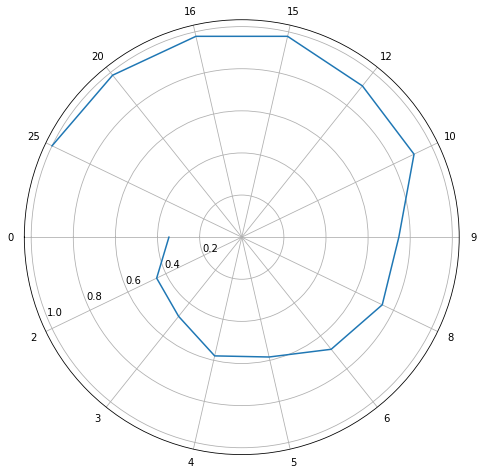

In [12]:
possible_ks = range(2,6)
possible_ms = range(1,6)
possible_s = set([a*b for a,b in (product(possible_ks,possible_ms))])
possible_s.add(0)
possible_s = sorted(list(possible_s))
scount = Counter(df.s)
ys = [scount[s] for s in possible_s]
ys_p = np.cumsum(ys) / np.sum(ys)

plt.figure(figsize=(8,8))
ax=plt.subplot(polar=True)
r_locs = np.linspace(0,2*np.pi,len(ys)+1)
ys_p = np.cumsum(ys) / np.sum(ys)

ax.set_theta_zero_location("W")

plt.plot(r_locs[0:-1],ys_p)
labels = [str(x) for x in possible_s]
lines, labels = plt.thetagrids(np.degrees(r_locs[0:-1]), labels=labels)
plt.show()


In [22]:
test_sub = 'gardening'
prefix = '/Users/u5233390/Dropbox/Work/PycharmProjects/wisdom of crowds/'

G = pickle.load(open(prefix+test_sub+'.nx','rb'))

crowd = Crowd(G)
scount = Counter()
print(len(crowd.node_set))
count = 0 
for node in crowd.node_set:
    count +=1 
    if count % 100 == 0:
        print(count//100,end=" ")
    s = crowd.S(node)
    scount[s]+=1

11295
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 

In [24]:
scount

Counter({0: 7198,
         2: 305,
         8: 275,
         10: 998,
         12: 273,
         4: 502,
         25: 299,
         16: 180,
         15: 283,
         6: 622,
         20: 227,
         9: 120,
         3: 12,
         5: 1})

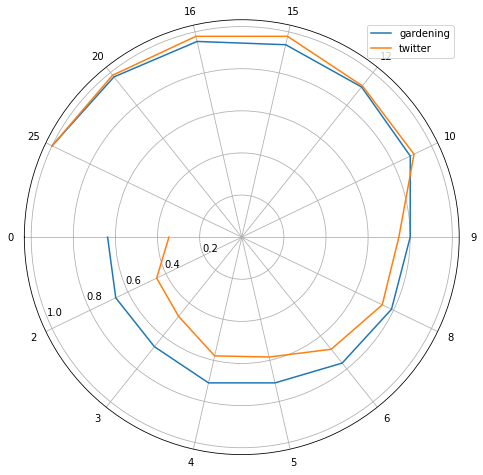

In [26]:
possible_ks = range(2,6)
possible_ms = range(1,6)
possible_s = set([a*b for a,b in (product(possible_ks,possible_ms))])
possible_s.add(0)
possible_s = sorted(list(possible_s))
ys = [scount[s] for s in possible_s]
ys_p = np.cumsum(ys) / np.sum(ys)

plt.figure(figsize=(8,8))
ax=plt.subplot(polar=True)
ax.set_theta_zero_location("W")




r_locs = np.linspace(0,2*np.pi,len(ys)+1)
ys_p = np.cumsum(ys) / np.sum(ys)

plt.plot(r_locs[0:-1],ys_p,label=test_sub)


labels = [str(x) for x in possible_s]
lines, labels = plt.thetagrids(np.degrees(r_locs[0:-1]), labels=labels)
plt.legend()
plt.show()

In [25]:
scount_dict = {test_sub: scount}
pickle.dump(scount_dict, open('scount_dict','wb'))

In [37]:
prefix = '/Users/u5233390/Dropbox/Work/PycharmProjects/wisdom of crowds/'


for test_sub in ['kotakuinaction','australia']:

    print(test_sub)
    G = pickle.load(open(prefix+test_sub+'.nx','rb'))

    crowd = Crowd(G)
    scount = Counter()
    print(len(crowd.node_set))
    count = 0 
    for node in crowd.node_set:
        count +=1 
        if count % 100 == 0:
            print(count//100,end=" ")
        s = crowd.S(node)
        scount[s]+=1
    scount_dict[test_sub] = scount
    
pickle.dump(scount_dict, open('scount_dict','wb'))

kotakuinaction
11718


KeyboardInterrupt: 

In [ ]:
scount_dict

In [ ]:
prefix = '/Users/u5233390/Dropbox/Work/PycharmProjects/wisdom of crowds/'
scount_dict = {}

for test_sub in ['gardening','crochet','conspiracy','kotakuinaction','australia']:

    print(test_sub)
    G = pickle.load(open(prefix+test_sub+'.nx','rb'))

    crowd = Crowd(G)
    scount = Counter()
    print(len(crowd.node_set))
    count = 0 
    for node in np.random.choice(list(crowd.node_set),1000,replace=False):
        count +=1 
        if count % 100 == 0:
            print(count//100,end=" ")
        s = crowd.S(node)
        scount[s]+=1
    scount_dict[test_sub] = scount
    

gardening
11295
1 2 3 4 5 6 7 8 9 10 crochet
4528
1 2 3 4 5 6 7 8 9 10 conspiracy
32512
1 2 3 4 5 6 7 8 9 10 kotakuinaction
11718
1 2 3 4 5 6 7 8 9 10 australia
19964
1 2 3 4 5 6 7 8 9 10 

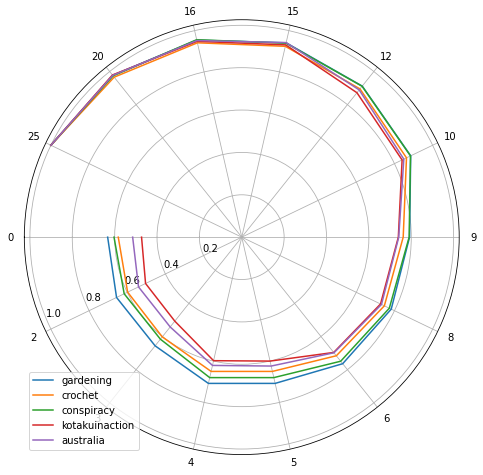

In [43]:
possible_ks = range(2,6)
possible_ms = range(1,6)
possible_s = set([a*b for a,b in (product(possible_ks,possible_ms))])
possible_s.add(0)
possible_s = sorted(list(possible_s))


plt.figure(figsize=(8,8))
ax=plt.subplot(polar=True)
ax.set_theta_zero_location("W")
r_locs = np.linspace(0,2*np.pi,len(ys)+1)

for sub in scount_dict:

    scount = scount_dict[sub]
    ys = [scount[s] for s in possible_s]
    ys_p = np.cumsum(ys) / np.sum(ys)


    plt.plot(r_locs[0:-1],ys_p,label=sub)


    labels = [str(x) for x in possible_s]
    lines, labels = plt.thetagrids(np.degrees(r_locs[0:-1]), labels=labels)
plt.legend()
plt.show()

In [44]:
pickle.dump(scount_dict,open('scount_dict1k.pkl','wb'))

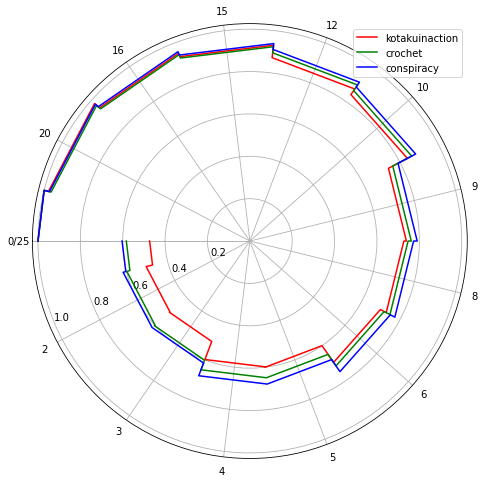

In [67]:
possible_ks = range(2,6)
possible_ms = range(1,6)
possible_s = set([a*b for a,b in (product(possible_ks,possible_ms))])
possible_s.add(0)
possible_s = sorted(list(possible_s))


plt.figure(figsize=(8,8))
ax=plt.subplot(polar=True)
ax.set_theta_zero_location("W")
r_locs = np.linspace(0,2*np.pi,len(ys))
width = (2*np.pi) / (len(ys))

color_list = ['r','g','b','m','c','y']
cc = 0 
for sub in ['kotakuinaction','crochet','conspiracy']['gardening','australia','kotakuinaction','crochet','conspiracy']: #scount_dict:

    scount = scount_dict[sub]
    ys = [scount[s] for s in possible_s]
    ys_p = np.cumsum(ys) / np.sum(ys)


    ax.step(r_locs,ys_p,label=sub,color=color_list[cc],where='mid')
    cc+=1

    labels = [str(x) for x in possible_s]
    labels[0] = ''
    labels[-1] = '0/25'
    lines, labels = plt.thetagrids(np.degrees(r_locs), labels=labels)
plt.legend()
plt.show()

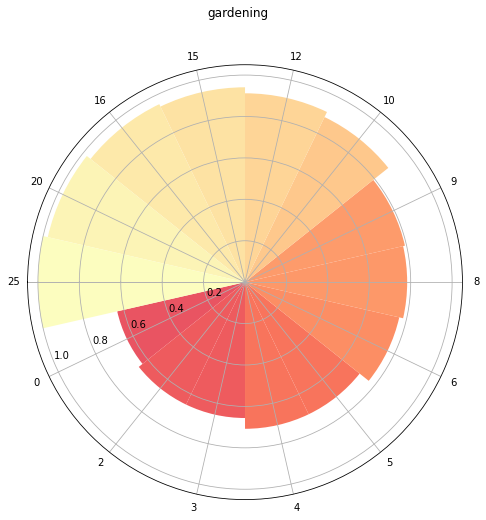

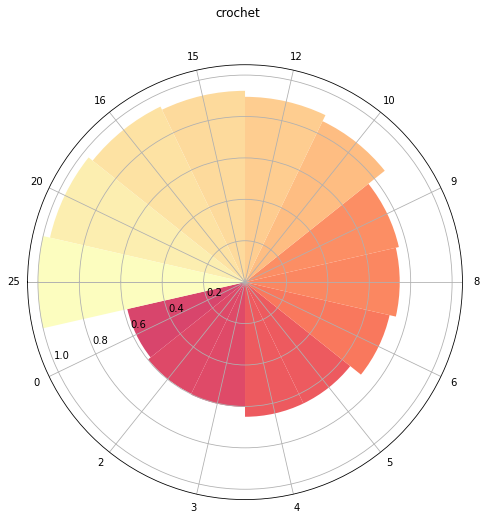

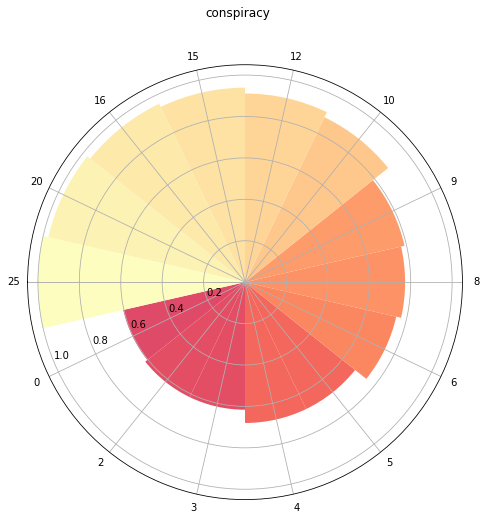

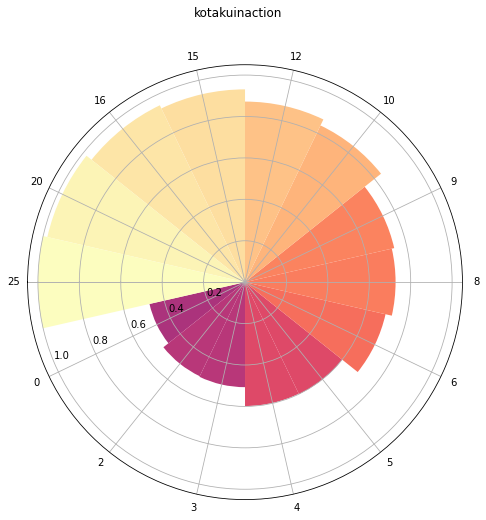

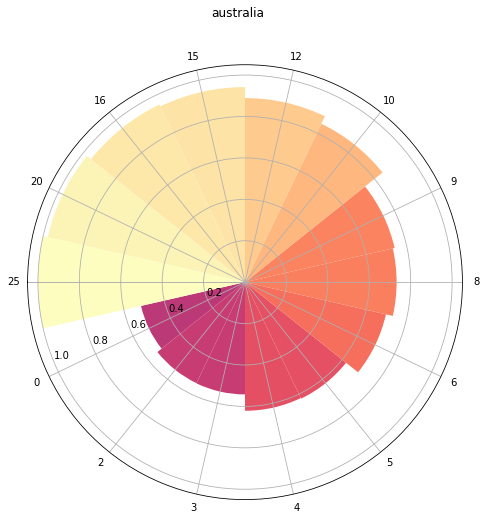

In [77]:
possible_ks = range(2,6)
possible_ms = range(1,6)
possible_s = set([a*b for a,b in (product(possible_ks,possible_ms))])
possible_s.add(0)
possible_s = sorted(list(possible_s))





for sub in scount_dict:
    
    scount = scount_dict[sub]
    ys = [scount[s] for s in possible_s]
    ys_p = np.cumsum(ys) / np.sum(ys)
    
    
    plt.figure(figsize=(8,8))
    ax=plt.subplot(polar=True)
    r_locs = np.linspace(0,2*np.pi,len(ys)+1)
    ys = [0]+ys
    ys_p = np.cumsum(ys) / np.sum(ys)

    ax.set_theta_zero_location("W")

    cm = plt.get_cmap('magma')

    colors = [(0,0,0,0)]
    for i,s in enumerate(possible_s):
        #colors.append(cm(i/len(possible_s)))
        colors.append(cm(ys_p[i+1]))



    width = (2*np.pi) / (len(ys)-1)
    plt.bar(r_locs,ys_p,color=colors,width=width,align='center')

    labels = [str(x) for x in possible_s]
    labels = ['']+labels

    lines, labels = plt.thetagrids(np.degrees(r_locs), labels=labels)
    plt.suptitle(sub)
    plt.show()




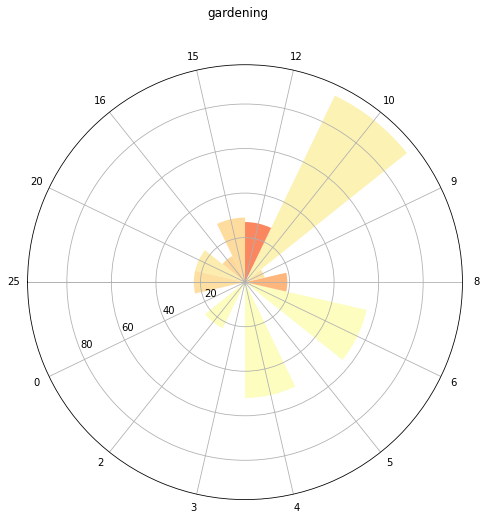

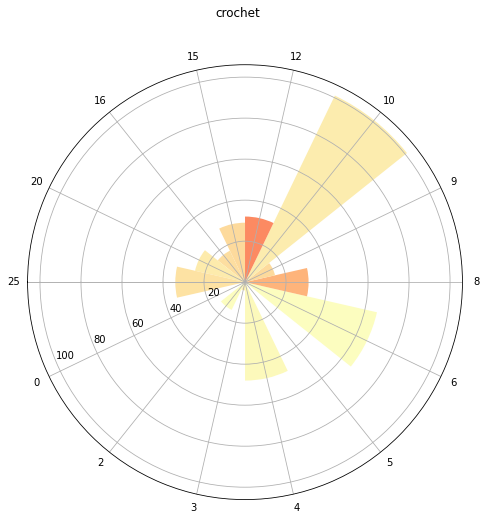

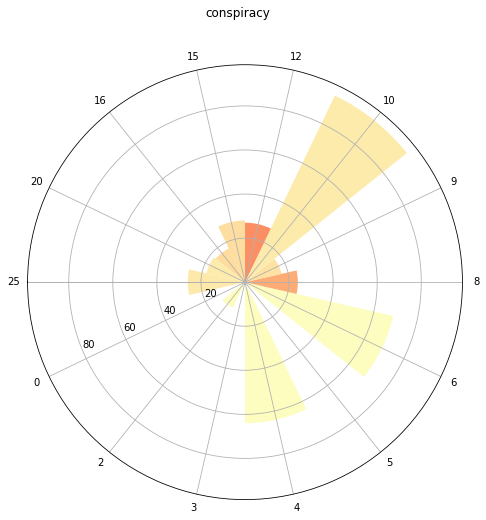

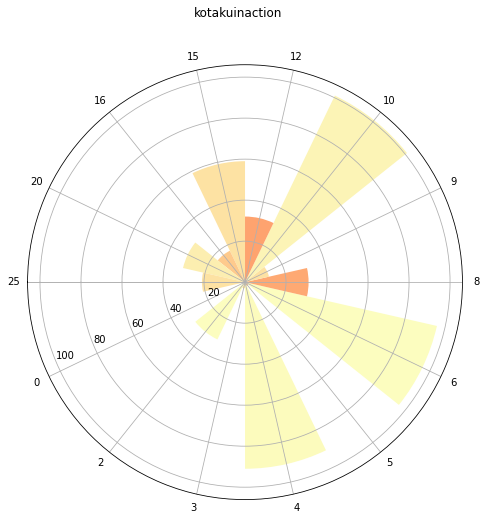

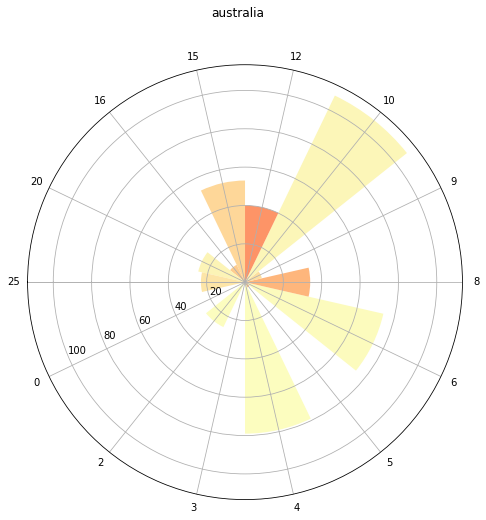

In [96]:
possible_ks = range(2,6)
possible_ms = range(1,6)
possible_s = set([a*b for a,b in (product(possible_ks,possible_ms))])
possible_s.add(0)
possible_s = sorted(list(possible_s))





for sub in scount_dict:
    
    scount = scount_dict[sub]
    ys = [scount[s] for s in possible_s]
    
    
    
    plt.figure(figsize=(8,8))
    ax=plt.subplot(polar=True)
    r_locs = np.linspace(0,2*np.pi,len(ys)+1)
    ys[0] = 0
    ys_p = ys

    ax.set_theta_zero_location("W")

    cm = plt.get_cmap('magma_r')

    colors = [(0,0,0,0)]
    for i,s in enumerate(possible_s[1:]):
        #colors.append(cm(i/len(possible_s)))
        colors.append(cm(ys_p[i]/sum(ys_p)))



    width = (2*np.pi) / (len(ys))
    plt.bar(r_locs[1:],ys_p,color=colors,width=width,align='center')

    labels = [str(x) for x in possible_s]
    labels = ['']+labels

    lines, labels = plt.thetagrids(np.degrees(r_locs), labels=labels)
    plt.suptitle(sub)
    plt.show()





In [92]:
len(r_locs)

15

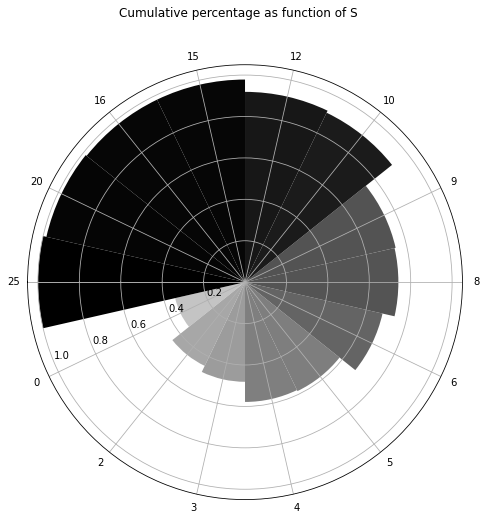

In [161]:
possible_ks = range(2,6)
possible_ms = range(1,6)
possible_s = set([a*b for a,b in (product(possible_ks,possible_ms))])
possible_s.add(0)
possible_s = sorted(list(possible_s))
scount = Counter(df.s)
ys = [scount[s] for s in possible_s]

plt.figure(figsize=(8,8))
ax=plt.subplot(polar=True)
r_locs = np.linspace(0,2*np.pi,len(ys)+1)
ys = [0]+ys
ys_p = np.cumsum(ys) / np.sum(ys)

ax.set_theta_zero_location("W")

cm = plt.get_cmap('Greys')

colors = [(0,0,0,0)]
for i,s in enumerate(possible_s):
    #colors.append(cm(i/len(possible_s)))
    colors.append(cm(ys_p[i+1]))



width = (2*np.pi) / (len(ys)-1)
plt.bar(r_locs,ys_p,color=colors,width=width,align='center')

labels = [str(x) for x in possible_s]
labels = ['']+labels

lines, labels = plt.thetagrids(np.degrees(r_locs), labels=labels)
plt.suptitle('Cumulative percentage as function of S')
plt.show()


In [155]:
list(zip(colors,ys_p))

[((0, 0, 0, 0), 0.0),
 ((1.0, 1.0, 1.0, 1.0), 0.34594594594594597),
 ((0.767443291041907, 0.767443291041907, 0.767443291041907, 1.0),
  0.4486486486486487),
 ((0.6530103806228374, 0.6530103806228374, 0.6530103806228374, 1.0),
  0.4810810810810811),
 ((0.6098269896193772, 0.6098269896193772, 0.6098269896193772, 1.0),
  0.5783783783783784),
 ((0.4999615532487506, 0.4999615532487506, 0.4999615532487506, 1.0),
  0.5837837837837838),
 ((0.4956555171088043, 0.4956555171088043, 0.4956555171088043, 1.0),
  0.6810810810810811),
 ((0.39160322952710497, 0.39160322952710497, 0.39160322952710497, 1.0),
  0.7405405405405405),
 ((0.3307035755478662, 0.3307035755478662, 0.3307035755478662, 1.0),
  0.745945945945946),
 ((0.32664359861591696, 0.32664359861591696, 0.32664359861591696, 1.0),
  0.9081081081081082),
 ((0.10469819300269129, 0.10469819300269129, 0.10469819300269129, 1.0),
  0.918918918918919),
 ((0.09104190695886198, 0.09104190695886198, 0.09104190695886198, 1.0),
  0.9783783783783784),
 ((0.

In [138]:
len(ys_p)

15

In [146]:
len(r_locs)

16

In [141]:
len(ys)

15

In [131]:
len(labels)

15

In [156]:
ys_p

array([0.        , 0.34594595, 0.44864865, 0.48108108, 0.57837838,
       0.58378378, 0.68108108, 0.74054054, 0.74594595, 0.90810811,
       0.91891892, 0.97837838, 0.97837838, 0.98378378, 1.        ])

In [144]:
ys

[64, 19, 6, 18, 1, 18, 11, 1, 30, 2, 11, 0, 1, 3, 0]

In [151]:
len(colors)

14

In [120]:
cm(1)

(0.9981545559400231, 0.9981545559400231, 0.9981545559400231, 1.0)

In [122]:
cm(.99)

(0.009104190695886194, 0.009104190695886194, 0.009104190695886194, 1.0)

In [125]:
possible_s

[0, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 20, 25]

In [126]:
ys

[0, 64, 19, 6, 18, 1, 18, 11, 1, 30, 2, 11, 0, 1, 3]

In [127]:
ys_p

array([0.        , 0.34594595, 0.44864865, 0.48108108, 0.57837838,
       0.58378378, 0.68108108, 0.74054054, 0.74594595, 0.90810811,
       0.91891892, 0.97837838, 0.97837838, 0.98378378, 1.        ])